In [1]:
import sys
sys.path.append("../")

from VQD_CAFQA import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getHeH(d):
    return molecule(f"He 0 0 0; H 0 0 {d}",charge=1)

In [4]:
CAFQA_parameterList = []
CAFQA_energiesList = []
k = 4
for d in np.linspace(0.5,2,7):
    coeffs,paulis,initial=getHeH(d)
    ansatz = efficientsu2(n_qubits=4,repetitions=2,initial=initial)
    ansatzList = [ansatz for i in range(k)]
    save_dir = 'HeH_Pairity_Data'
    energies,paramList = run_genetic_cafqa_vqd(coeffs,paulis,ansatzList,k,save_dir=save_dir,name=f'HeH_Pairity Distance: {d}',
                         budget=10**5,
                         num_parents_mating = 4, 
                         sol_per_pop = 8, 
                         parent_selection_type = "sss", 
                         keep_parents = 1, 
                         crossover_type = "single_point",
                         crossover_probability=0.75, 
                         mutation_type = "random", 
                         mutation_probability = 0.01,
                         keep_elitism=1,
                         parallel=4)
    CAFQA_parameterList.append(paramList)
    CAFQA_energiesList.append(energies)

/opt/conda/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [5]:
D=[]
for d in np.linspace(0.5,2,100):
    coeffs,paulis,_ = getHeH(d)
    D.append(get_energies(coeffs,paulis))

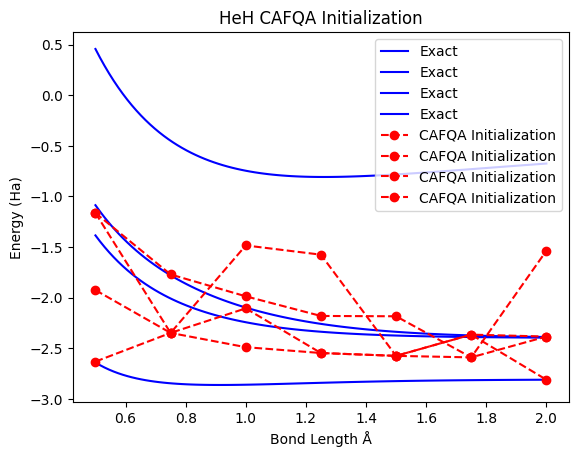

In [6]:
plt.plot(np.linspace(0.5,2,100),D,'-',color='blue',label='Exact')
plt.plot(np.linspace(0.5,2,7),CAFQA_energiesList,'r--o',label="CAFQA Initialization")
plt.xlabel('Bond Length Å')
plt.ylabel('Energy (Ha)')
plt.title('HeH CAFQA Initialization')
plt.legend()